# Применение условных вероятностей на примере данных о Продажах шоколада

Задание: На наборе данных о продажах шоколада необходимо продемонстрировать применение условных вероятностей. Также рассматриваемый набор занных необходимо описать. 

**Источник данных: https://www.kaggle.com/datasets/saidaminsaidaxmadov/chocolate-sales**

In [20]:
import pandas as pd 
import numpy as np 

## Загрузка и описание данных

In [21]:
df = pd.read_csv("Data/Chocolate.csv")

In [22]:
print("Размерность данных", df.shape)

Размерность данных (3282, 6)


In [23]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


**Описание признаков набора данных**

In [24]:
print("Столбцы:", df.columns.tolist())

Столбцы: ['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped']


Продавец, Страна продажи, Название продукта, Дата продажи, Сумма продажи, Количество отправленных коробок

**Уникальность объектов некоторых столбцов**

In [25]:
df['Sales Person'].unique()

array(['Jehu Rudeforth', 'Van Tuxwell', 'Gigi Bohling', 'Jan Morforth',
       'Oby Sorrel', 'Gunar Cockshoot', 'Brien Boise',
       'Rafaelita Blaksland', 'Barr Faughny', 'Mallorie Waber',
       'Karlen McCaffrey', "Marney O'Breen", 'Beverie Moffet',
       'Roddy Speechley', 'Curtice Advani', 'Husein Augar', 'Kaine Padly',
       'Dennison Crosswaite', "Wilone O'Kielt", 'Andria Kimpton',
       'Kelci Walkden', 'Camilla Castle', 'Madelene Upcott',
       'Dotty Strutley', 'Ches Bonnell'], dtype=object)

In [26]:
df['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [27]:
df['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

**Информация о данных**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


| Признак | Тип данных | Описание | Проблемы | Потенциал |
|:-:|-|-|-|-|
|Sales Person|Текстовый|Специалист по продажам|Много уникальных|Группировка по эффективности|
|Country|Текстовый|Страна продажи|-|-|
|Product|Текстовый|Наименование шоколадного продукта|Много уникальных|Группировка по категориям|
|Date|Текстовый|Дата продажи|Формат|Извлечение месяца, дня недели|
|Amount|Текстовый|Сумма продажи|Формат|-|
|Boxes Shipped|Числовой|Количество проданных коробок|-|Извлечение цены за коробку|

**Пропущенные значения**

In [29]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

**Предварительная обработка данных**

In [30]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


**Сводные таблицы**

In [36]:
print("Продажи по странам:")
pivot_country = pd.pivot_table(
    df,
    values='Amount',
    index='Country',
    aggfunc=['sum', 'mean', 'count']
)
print(pivot_country)

Продажи по странам:
                    sum         mean  count
                 Amount       Amount Amount
Country                                    
Australia    3646444.35  5929.177805    615
Canada       3078495.65  5863.801238    525
India        3343730.83  6057.483388    552
New Zealand  3043654.04  5864.458651    519
UK           3365388.90  6302.226404    534
USA          3313858.09  6171.057896    537


In [38]:
print("Продажи по продуктам и странам:")
pivot_product_country = pd.pivot_table(
    df,
    values='Amount',
    index='Product',
    columns='Country',
    aggfunc='mean',
    fill_value=0
)
print(pivot_product_country)

Продажи по продуктам и странам:
Country                 Australia       Canada        India  New Zealand  \
Product                                                                    
50% Dark Bites        5834.725417  7878.015000  8622.656667  5437.901905   
70% Dark Bites        4723.720741  7904.104583  5266.110476  6479.870000   
85% Dark Bars         5141.597083  6682.987778  6652.071852  5996.710556   
99% Dark & Pure       5340.836970  7800.762222  5663.903333  6942.746000   
After Nines           4269.462381  6422.426190  6254.600667  4928.053611   
Almond Choco          4570.121212  5646.434583  6040.762963  6234.175333   
Baker's Choco Chips   6879.238519  7770.758667  5926.202667  6107.064167   
Caramel Stuffed Bars  6132.147143  5901.665556  4232.040741  6092.262778   
Choco Coated Almonds  6620.177222  6115.306333  4272.860000  7377.505556   
Drinking Coco         4596.626667  5668.197778  6179.312917  5626.748333   
Eclairs               6948.991000  2881.000741  5602.389

## Рассчет вероятностей

### Простые вероятности

Вероятность продажи в определенной стране

In [39]:
for c in df['Country'].unique():
    P_country = (df['Country'] == c).mean()
    print(f"P({c}) = {P_country:.3f}")

P(UK) = 0.163
P(India) = 0.168
P(Australia) = 0.187
P(New Zealand) = 0.158
P(USA) = 0.164
P(Canada) = 0.160


### Условные вероятности

**Вероятность высокой продажи (> 10000 $) при продаже в Австралии**

$$
P(HighAmount | Australia) = \frac{P(HighAmount\cdot{Australia})}{P(Australia)}
$$

In [54]:
# Способ 1
P_aus = (df['Country'] == 'Australia').mean()
P_high_and_aus = ((df['Amount'] > 10000) & (df['Country'] == 'Australia')).mean() 
P_high_in_aus = P_high_and_aus / P_aus 
print(f"P(HighAmount | Australia) = {P_high_in_aus:.4f}")

P(HighAmount | Australia) = 0.1480


In [55]:
# Способ 2
aus_sales = df[df['Country'] == 'Australia']
P_high_in_aus = (aus_sales['Amount'] > 10000).mean()
print(f"P(HighAmount | Australia) = {P_high_in_aus:.4f}")

P(HighAmount | Australia) = 0.1480


**Вероятность продажи продукта White Choc в США**

$$
P(White Choc | USA) = \frac{P(White Choc\cdot{USA})}{P(USA)}
$$

In [56]:
usa_sales = df[df['Country'] == 'USA']
P_wc_in_usa = (usa_sales['Product'] == 'White Choc').mean()
print(f"P(White Choc | USA) = {P_wc_in_usa:.4f}")

P(White Choc | USA) = 0.0559


**Вероятность большой поставки (> 100 коробок) продукта Eclairs**

$$
P(ManyBoxes | Eclairs) = \frac{P(ManyBoxes\cdot{Eclairs})}{P(Eclairs)}
$$

In [57]:
eclairs_sales = df[df['Product'] == 'Eclairs']
P_high_if_eclairs = (eclairs_sales['Boxes Shipped'] > 100).mean()
print(f"P(ManyBoxes | Eclairs) = {P_high_if_eclairs:.4f}")

P(ManyBoxes | Eclairs) = 0.5333


**Обобщение вычисления условных вероятностей**

In [58]:
def conditional_probability(df, condition_col, condition_val, target_col, target_val=1):
    """
    Вычисляет условную вероятность
    P(target_col=target_val | condition_col=condition_val)
    """
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

In [59]:
prob = conditional_probability(df, 'Country', 'USA', 'Product', 'White Choc')
print(f"P(White Choc | USA): {prob:.4f}")

P(White Choc | USA): 0.0559


In [62]:
# Для удобства добавляем в датафрейм столбец с информацией о высокой стоимости при продаже
df['HighAmount'] = (df['Amount'] > 10000).astype(int)

In [83]:
print("Вероятность высокой продажи для каждой страны:")
for c in df['Country'].unique():
    prob = conditional_probability(df, 'Country', c, 'HighAmount')
    print(f" P(HighAmount | {c}) = {prob:.4f}")

Вероятность высокой продажи для каждой страны:
 P(HighAmount | UK) = 0.1948
 P(HighAmount | India) = 0.1993
 P(HighAmount | Australia) = 0.1480
 P(HighAmount | New Zealand) = 0.1484
 P(HighAmount | USA) = 0.2067
 P(HighAmount | Canada) = 0.1676


In [84]:
print("Вероятность продажи определенного продукта в конкретной стране:")
for name in sorted(df['Product'].unique()):
    for c in df['Country'].unique():
        prob = conditional_probability(df, 'Country', c, 'Product', name)
        print(f"P({name} | {c}) = {prob:.4f}")

Вероятность продажи определенного продукта в конкретной стране:
P(50% Dark Bites | UK) = 0.0674
P(50% Dark Bites | India) = 0.0435
P(50% Dark Bites | Australia) = 0.0780
P(50% Dark Bites | New Zealand) = 0.0405
P(50% Dark Bites | USA) = 0.0615
P(50% Dark Bites | Canada) = 0.0343
P(70% Dark Bites | UK) = 0.0337
P(70% Dark Bites | India) = 0.0380
P(70% Dark Bites | Australia) = 0.0439
P(70% Dark Bites | New Zealand) = 0.0347
P(70% Dark Bites | USA) = 0.0335
P(70% Dark Bites | Canada) = 0.0457
P(85% Dark Bars | UK) = 0.0337
P(85% Dark Bars | India) = 0.0489
P(85% Dark Bars | Australia) = 0.0390
P(85% Dark Bars | New Zealand) = 0.0694
P(85% Dark Bars | USA) = 0.0503
P(85% Dark Bars | Canada) = 0.0343
P(99% Dark & Pure | UK) = 0.0618
P(99% Dark & Pure | India) = 0.0435
P(99% Dark & Pure | Australia) = 0.0537
P(99% Dark & Pure | New Zealand) = 0.0289
P(99% Dark & Pure | USA) = 0.0447
P(99% Dark & Pure | Canada) = 0.0343
P(After Nines | UK) = 0.0281
P(After Nines | India) = 0.0543
P(After Nin

### Формула полной вероятности 

Зная вероятность высокой продажи для каждой страны, можно найти общую вероятность высокой продажи P(HighAmount).

Формула полной вероятности:
$$
P(A) = \sum_{i} P(A|B_{i}) \cdot{P(B_{i})}
$$

Для нашего конкретного случая формула полной вероятности:
$$
P(HighAmount) = \sum_{i} P(HighAmount|Country_{i}) \cdot{P(Country_{i})}
$$

In [85]:
total_prob = 0
prob_details = []

for country in df['Country'].unique():
    P_country = (df['Country'] == country).mean()
    P_high_country = conditional_probability(df, 'Country', country, 'HighAmount')
    
    contribution = P_high_country * P_country
    total_prob += contribution
    
    prob_details.append({
        'Country': country,
        'P(Country)': P_country,
        'P(HighAmount|Country)': P_high_country,
        'Вклад': contribution
    })

prob_df = pd.DataFrame(prob_details)
print(prob_df.round(4))

print(f"\nОбщая вероятность высокой продажи (по формуле): {total_prob:.4f}")
print(f"Прямой расчет из данных: {df['HighAmount'].mean():.4f}")

       Country  P(Country)  P(HighAmount|Country)   Вклад
0           UK      0.1627                 0.1948  0.0317
1        India      0.1682                 0.1993  0.0335
2    Australia      0.1874                 0.1480  0.0277
3  New Zealand      0.1581                 0.1484  0.0235
4          USA      0.1636                 0.2067  0.0338
5       Canada      0.1600                 0.1676  0.0268

Общая вероятность высокой продажи (по формуле): 0.1770
Прямой расчет из данных: 0.1770


In [79]:
import matplotlib.pyplot as plt

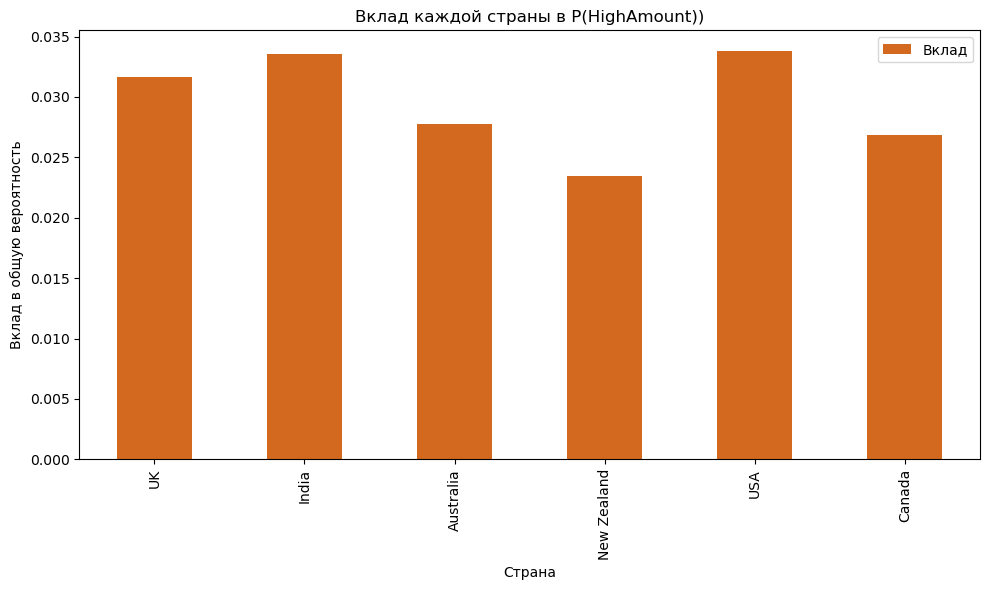

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))

prob_df.plot(x='Country', y='Вклад', kind='bar', ax=ax, color='chocolate')

ax.set_title('Вклад каждой страны в P(HighAmount))')
ax.set_ylabel('Вклад в общую вероятность')
ax.set_xlabel('Страна')

plt.tight_layout()
plt.show()

### Формула Байеса

Зная, что совершена продажа высокой стоимости, можно понять в какой стране она скорее всего произошла. То есть найти P(Country∣HighAmount).

Теорема Байеса:
$$
P(A|B) = \frac{P(A) \cdot{P(B|A)}}{P(B)}
$$
В нашем случае: A - Country=i; B - HighAmount=1
$$
P(Country|HighAmount) = \frac{P(Country) \cdot{P(HighAmount|Country)}}{P(HighAmount)}
$$

In [94]:
P_high = df['HighAmount'].mean()

bayes_results = []

for c in df['Country'].unique():
    P_country = (df['Country'] == c).mean()
    P_high_country = conditional_probability(df, 'Country', c, 'HighAmount')
    
    P_country_high = (P_high_country * P_country) / P_high
    
    bayes_results.append({
        'Country': c,
        'P(Country)': P_country,
        'P(HighAmount|Country)': P_high_country,
        'P(Country|HighAmount)': P_country_high
    })

bayes_df = pd.DataFrame(bayes_results)
print("Результаты применения теоремы Байеса:")
print(bayes_df.round(3))

Результаты применения теоремы Байеса:
       Country  P(Country)  P(HighAmount|Country)  P(Country|HighAmount)
0           UK       0.163                  0.195                  0.179
1        India       0.168                  0.199                  0.189
2    Australia       0.187                  0.148                  0.157
3  New Zealand       0.158                  0.148                  0.133
4          USA       0.164                  0.207                  0.191
5       Canada       0.160                  0.168                  0.151


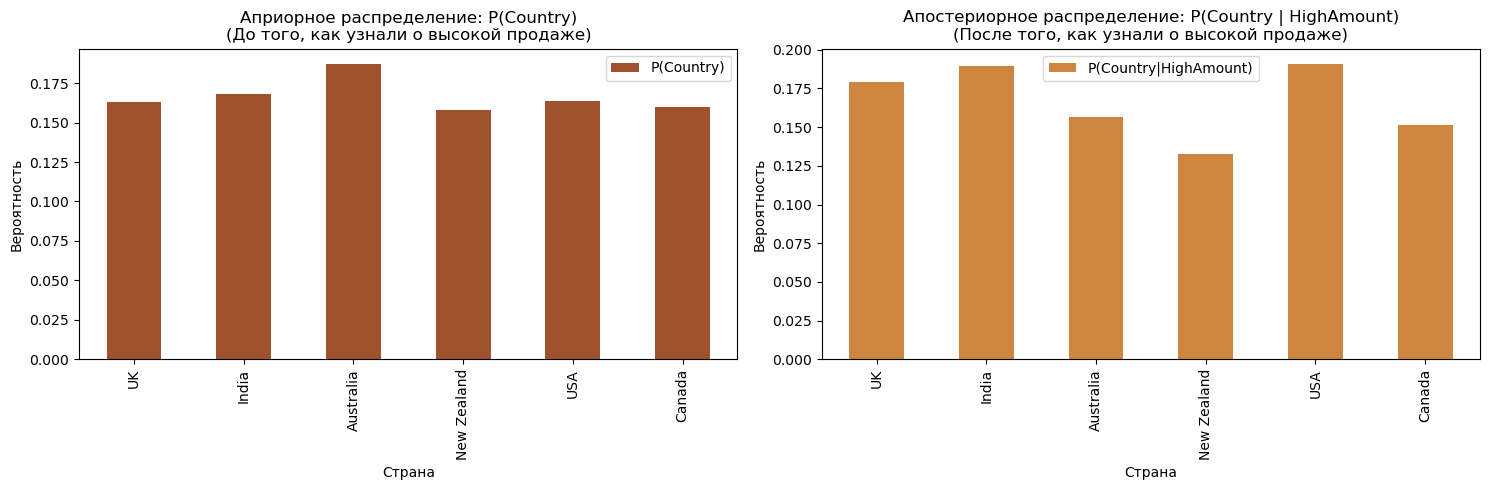

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Априорное распределение
bayes_df.plot(x='Country', y='P(Country)', kind='bar', ax=ax1, color='sienna')
ax1.set_title('Априорное распределение: P(Country)\n(До того, как узнали о высокой продаже)')
ax1.set_ylabel('Вероятность')
ax1.set_xlabel('Страна')

# Апостериорное распределение
bayes_df.plot(x='Country', y='P(Country|HighAmount)', kind='bar', ax=ax2, color='peru')
ax2.set_title('Апостериорное распределение: P(Country | HighAmount)\n(После того, как узнали о высокой продаже)')
ax2.set_ylabel('Вероятность')
ax2.set_xlabel('Страна')

plt.tight_layout()
plt.show()